# Lab 7: Cluster Analysis


This lab material is largely self-contained. We assume that every student has already taken STAT7008 or knows some basic operations of Python. Noet that you may use Anaconda to run the .ipynb file. For the installation of Anaconda, please see https://conda.io/docs/user-guide/install/index.html.

### Purpose

In Lab 7, you will learn how to:

a. do k-means. 

b. do hierarchical clustering (HC). 

### Useful libraries for this Lab

a. numpy, for data array. 

b. sklearn and scipy, for modelling.

c. matplotlib, for plotting.

d. os, for the working directory. 

In [1]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering as H_C
from sklearn.cluster import KMeans as KMeans
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np
import os

wd = os.getcwd() # Set your working directory. 
print wd

/home/renjielu/PycharmProjects/DM8017/DM_Lab7


In Lab 7, we consider to make use of Iris, a data set, to show k-means and hierarchical clustering. The data description can be shown by using iris.DESCR, see Lab 5. The data contains three different types of iris plant (3 classes). Each plant is characterized by 4 features. Note that both methods presented in this lab belong to the field of unsupervisored learning, the target variable y is thus useless and omitted.  

In [2]:
iris = datasets.load_iris()
X = iris.data  
# y = iris.target

print type(X)
print X[:5,:]

<type 'numpy.ndarray'>
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


For K-means, we consider two settings about the number of clusters (K): K = 3 and K = 8. We randomly choose K observations from data for the initial centers, see the setting of the argument init. We repeat 30 times the K-means method with different centers (n_init=30). The final results will be the best output of these runs. The centers are printed by using the attribute cluster_centers_. 

[[ 5.15238095  3.52857143]
 [ 5.52857143  4.04285714]
 [ 6.275       2.635     ]
 [ 5.20769231  2.41538462]
 [ 4.70952381  3.15238095]
 [ 7.475       3.125     ]
 [ 5.8         2.86785714]
 [ 6.62142857  3.12857143]]
[[ 5.77358491  2.69245283]
 [ 5.006       3.418     ]
 [ 6.81276596  3.07446809]]
12.7566538462
37.1237021277


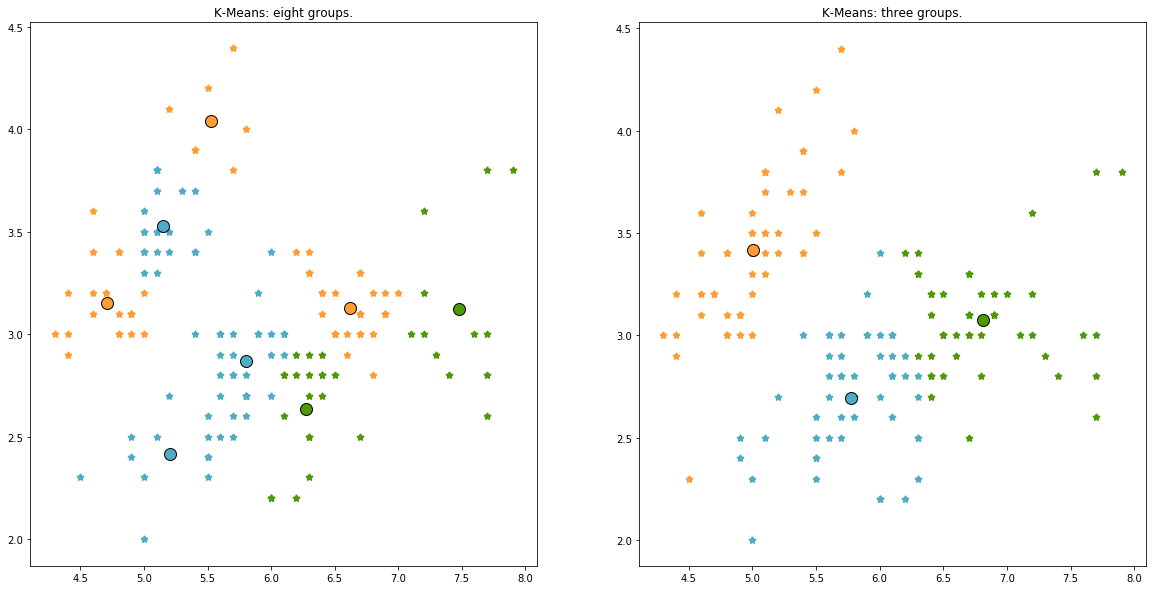

In [21]:
K8_means = KMeans(n_init=30, init='random', random_state=0) # The default number of clusters is 8. 

K3_means = KMeans(n_clusters=3, n_init=30, init='random', random_state=0) 

K8_results = K8_means.fit(X[:,:2])
K3_results = K3_means.fit(X[:,:2])

print K8_results.cluster_centers_
print K3_results.cluster_centers_


print K8_results.inertia_
print K3_results.inertia_

#####################################################

fig = plt.figure(figsize=(20, 10))

K8_means_labels = K8_means.fit_predict(X[:,:2])
K3_means_labels = K3_means.fit_predict(X[:,:2])

eight_colors = ['#4EACC5', '#FF9C34', '#4E9A06','#4EACC5', '#FF9C34', '#4E9A06','#4EACC5', '#FF9C34']
three_colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# K8_means
ax = fig.add_subplot(1, 2, 1)
for k, col in zip(range(8), eight_colors):
    my_members = K8_means_labels == k
    cluster_center = K8_means.cluster_centers_[k]
    ax.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='*', linewidths=2)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=12)
ax.set_title('K-Means: eight groups.')


# MiniBatchKMeans
ax = fig.add_subplot(1, 2, 2)
for k, col in zip(range(3), three_colors):
    my_members = K3_means_labels == k
    cluster_center = K3_means.cluster_centers_[k]
    ax.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='*', linewidths=2)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=12)
ax.set_title('K-Means: three groups.')

plt.show()


Turn to the hierarchical clustering, we consider two linkage methods: ward and complete. For more details about these linkage methods, please refer to the lecture note of Chpater 7. Note that Sklearn only provides three linkage methods: ward, complete and average. The default setting is ward. By taking advantage of function called dendrogram in Scipy package, we plot the hierarchical charts. 

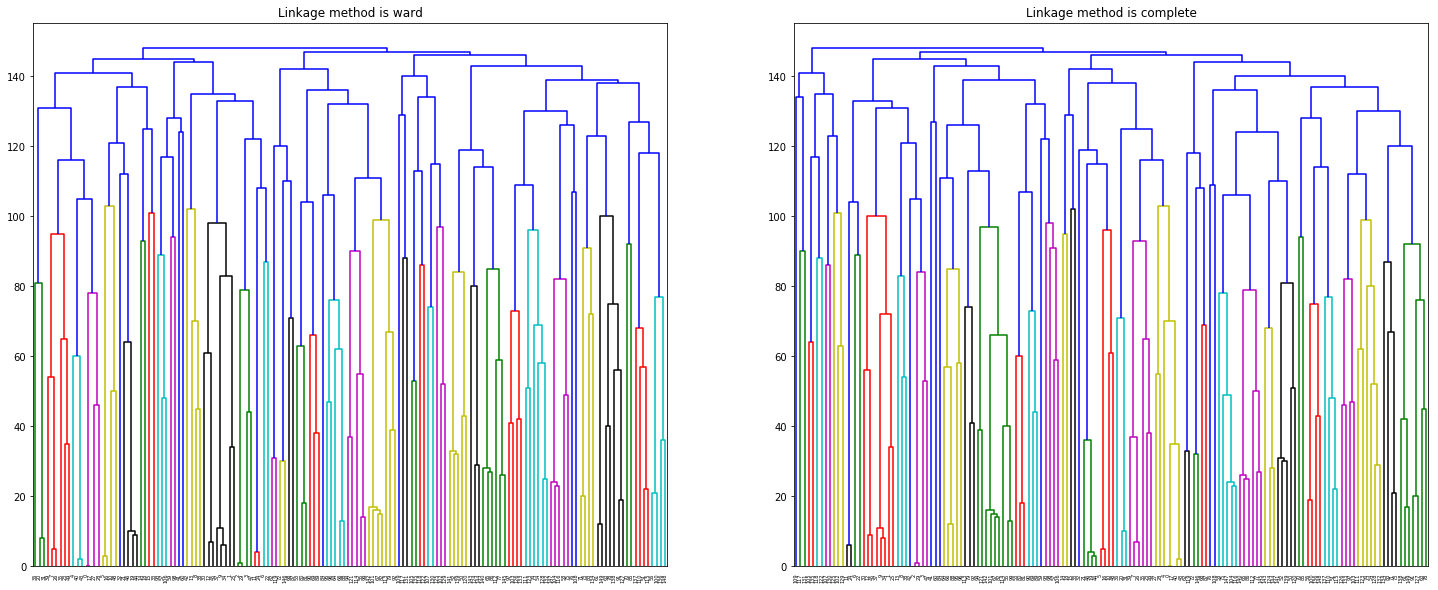

In [45]:

H_C_ward = H_C(n_clusters=3) # default linkage is ward. 
H_C_complete = H_C(n_clusters=3, linkage='complete')

H_C_ward.fit(X[:,:2])
H_C_complete.fit(X[:,:2])

def plot_dendrogram(model, **kwargs): # provided by Mathew Kallada. 

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    
    sch.dendrogram(linkage_matrix, **kwargs)

fig = plt.figure(figsize=(25, 10))

ax = fig.add_subplot(1, 2, 1)
plot_dendrogram(H_C_ward)
ax.set_title('Linkage method is ward')

ax = fig.add_subplot(1, 2, 2)
Z2 = plot_dendrogram(H_C_complete)
ax.set_title('Linkage method is complete')

plt.show()